In [1]:
from sklearn.datasets import make_regression

In [2]:
# importing a simple regression dataset
X,y = make_regression( n_samples = 15, n_features = 1, n_informative = 1,
                      n_targets = 1,noise=10, random_state = 83)

In [3]:
X # showing the input and output

array([[-1.08056649],
       [ 0.09447164],
       [-1.12274722],
       [-1.03965701],
       [ 1.42993841],
       [-0.46482673],
       [-0.98450391],
       [ 1.06177198],
       [-0.57823174],
       [ 1.14308469],
       [-0.66538354],
       [ 0.67497599],
       [ 1.11757542],
       [ 0.84931289],
       [-0.3771686 ]])

In [4]:
y

array([-47.3975475 ,   0.5839787 , -51.65592031, -56.30543186,
        69.42631394, -10.03026498, -49.17460787,  63.82073075,
       -35.50975707,  57.90062129, -20.70993044,  18.28553862,
        38.75200393,  35.85118215, -18.54613536])

In [5]:
import matplotlib.pyplot as plt
import numpy as np

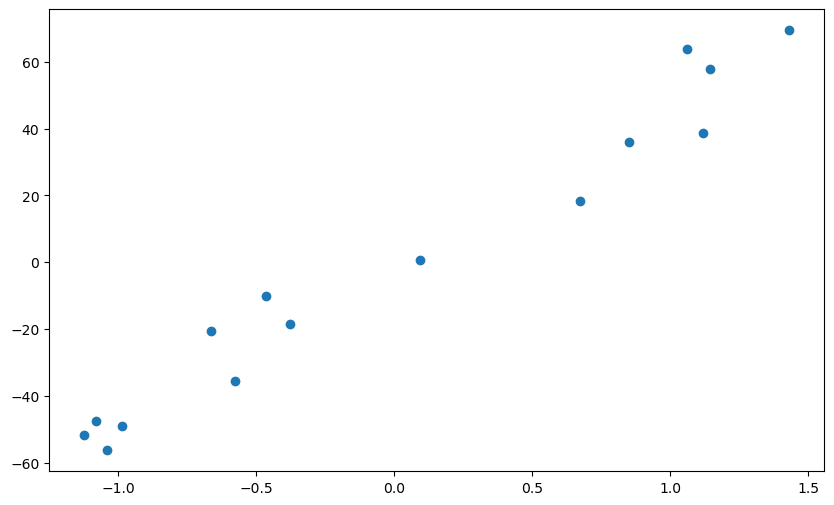

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [9]:
print(f'm = {lreg.coef_}')
print(f'b = {lreg.intercept_}')

m = [46.42197217]
b = -0.4935883537411853


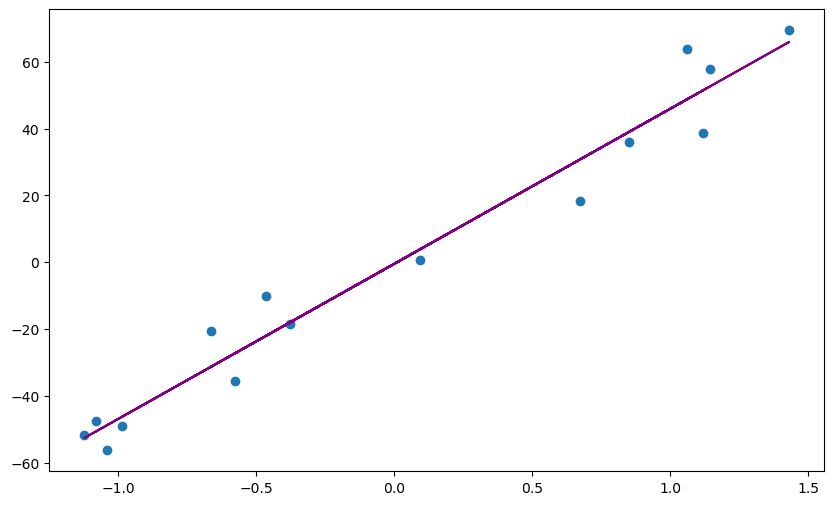

In [10]:
m = lreg.coef_ #coef_ return all the weights found by sklearn's linear regression model
b = lreg.intercept_ #intercept_ return the bias value
y_pred = lreg.predict(X)
#print(y_pred)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple')
plt.show()

[-28.16202743  26.38555982 -30.12014006 -26.26292864  88.38056112
   0.42182629 -23.70261332  71.28954936  -4.84265782  75.06424579
  -8.88841605  53.33371642  73.88005502  61.42677916   4.49108965]


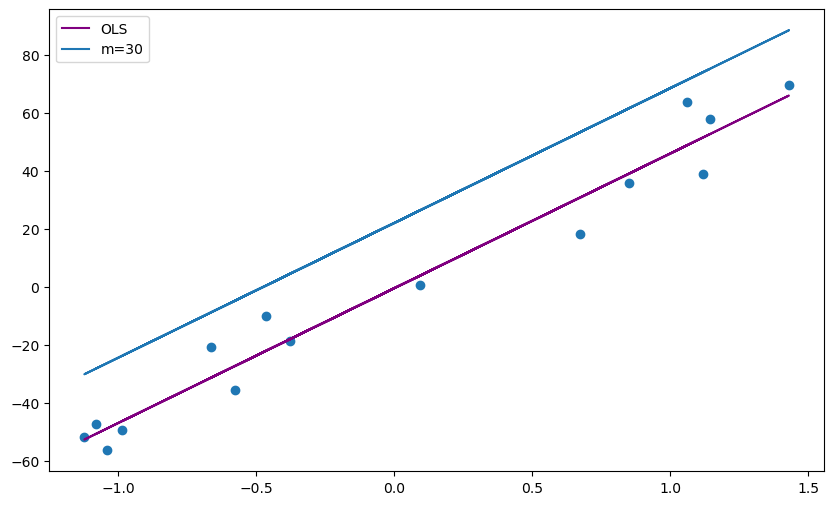

In [12]:
m = 46.42197217
b = 22 # Take a random value
y_pred_new = (m*X.ravel()+b) # prediction for the value
print(y_pred_new)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS') # Actual line from sklearn
plt.plot(X,y_pred_new, label='m=30')# our models predicted line
plt.legend()
plt.show()

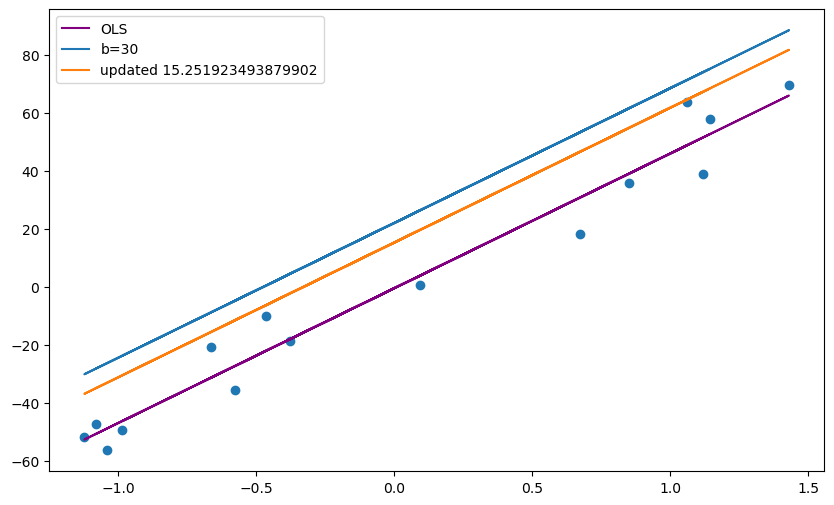

In [13]:
## Running the same code for the 2nd time and we can see improvement
### The line move from blue to the orange line
### See the value changes of b in the figure below

lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b = b - lr*slope

y_pred_newest = m*X+b

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS')
plt.plot(X,y_pred_new, label='b=30')
plt.plot(X,y_pred_newest, label=f'updated {b}')
plt.legend()
plt.show()

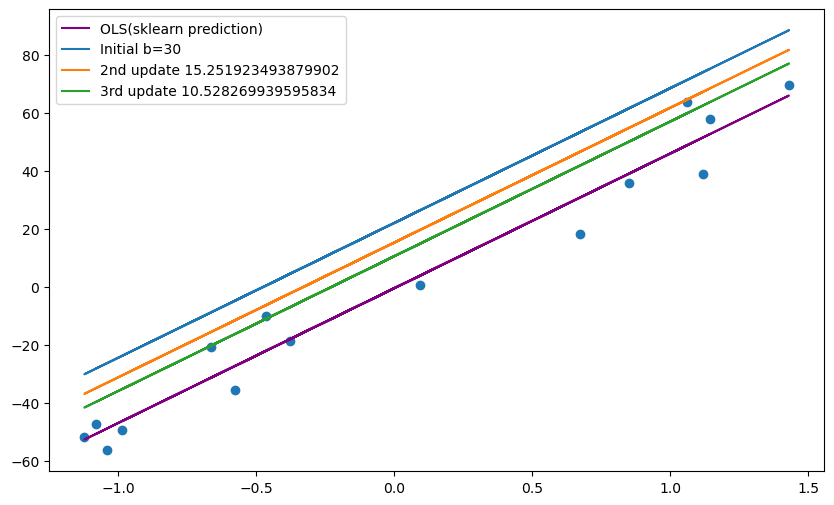

In [14]:
lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b_last = b - lr*slope

y_pred_newest_last = m*X+b_last

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS(sklearn prediction)')
plt.plot(X,y_pred_new, label='Initial b=30')
plt.plot(X,y_pred_newest, label=f'2nd update {b}')
plt.plot(X,y_pred_newest_last, label=f'3rd update {b_last}')
plt.legend()
plt.show()

In [15]:
all_b = np.arange(-20,20,0.5) #random values of b from -20 to 20
loss = [] # it will store the losses for every b,loss is a list
for b in all_b:
  loss.append(np.power(np.sum(y-m*X.ravel()-b),2)) # I use OLS here (y-y_hat)^2 or (y-mx-b)^2

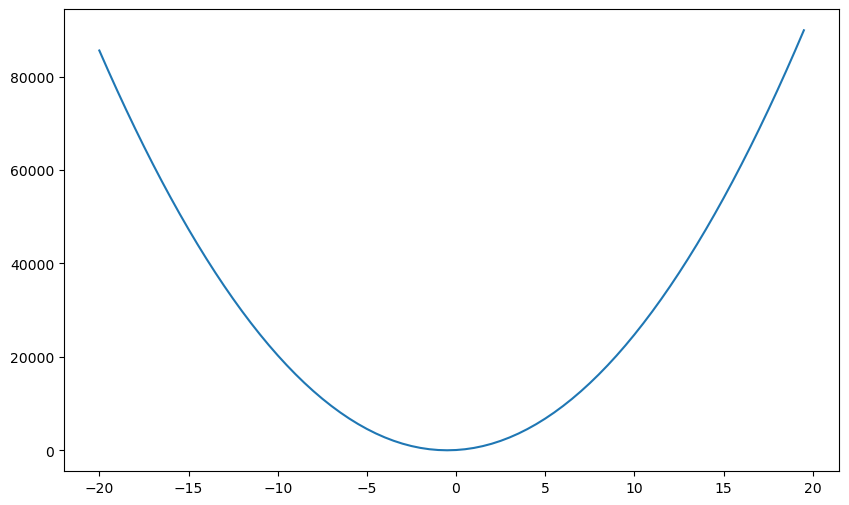

In [16]:
# this shows how are loss function looks like
plt.figure(figsize=(10,6))
plt.plot(all_b,loss)
plt.show()

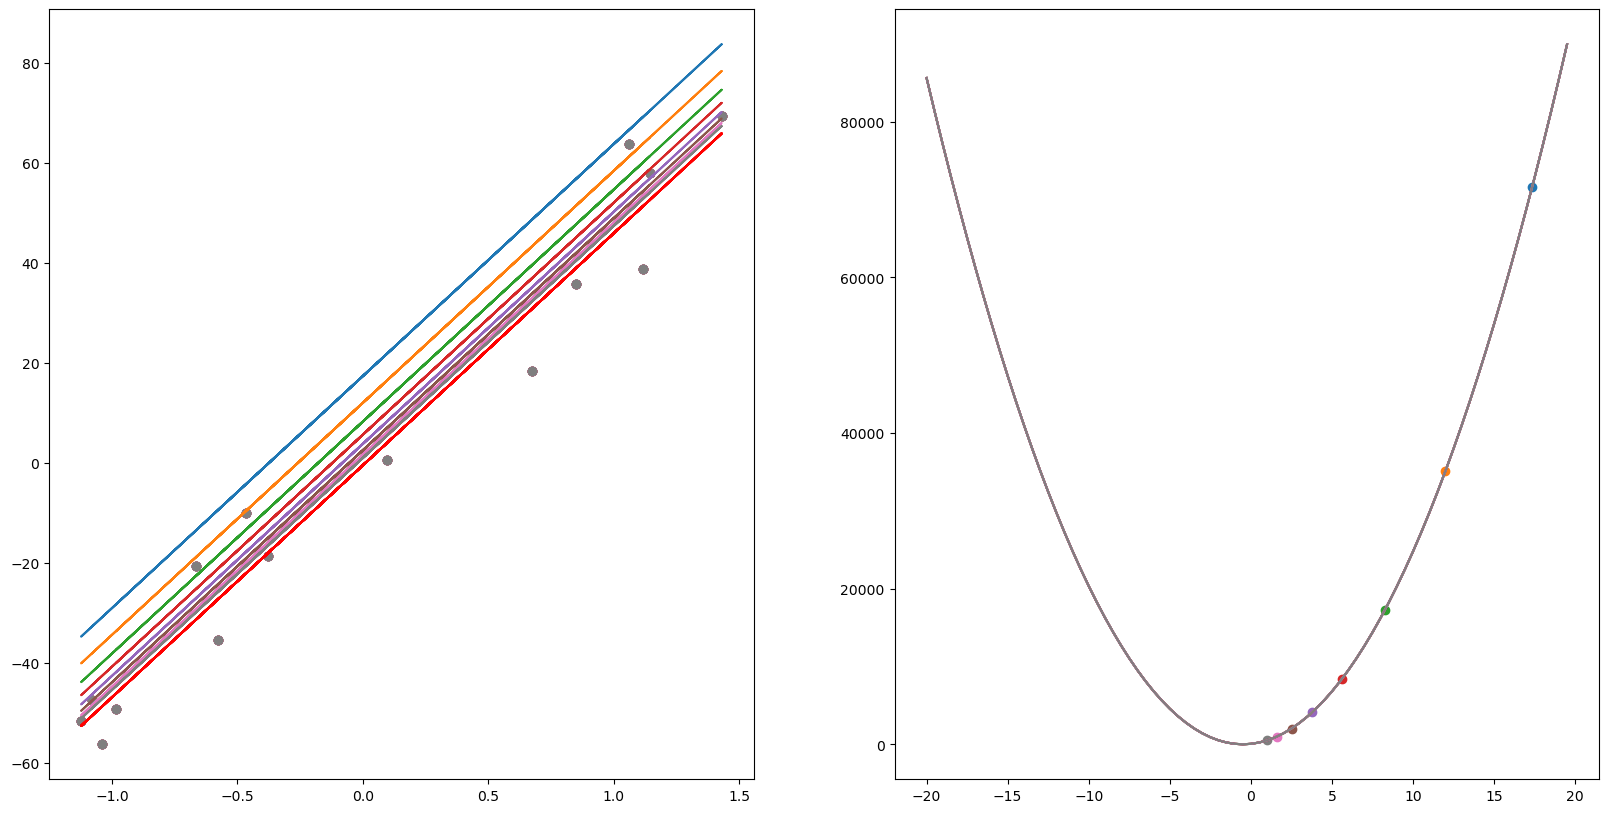

In [17]:
m = lreg.coef_   # lr.coef_  from above algorithm
b  = 25
lrate = 0.01
slope = -2*np.sum(y-m*X.ravel()-b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


for i in range(8):
    slope = -2*np.sum(y-m*X.ravel()-b)
    b = b - lrate*slope
    l = np.power(np.sum(y-m*X.ravel()-b),2) # loss
    y_pred_newest = m*X.ravel()+b
    ax1.plot(X,y_pred_newest)
    ax1.scatter(X,y)
    ax1.plot(X,lreg.predict(X),color='red', label='OLS') # Actaul line
    ax2.plot(all_b,loss)
    ax2.scatter(b,l)
  
plt.show()

In [18]:
from sklearn.datasets import make_regression

In [19]:
import matplotlib.pyplot as plt
import numpy as np

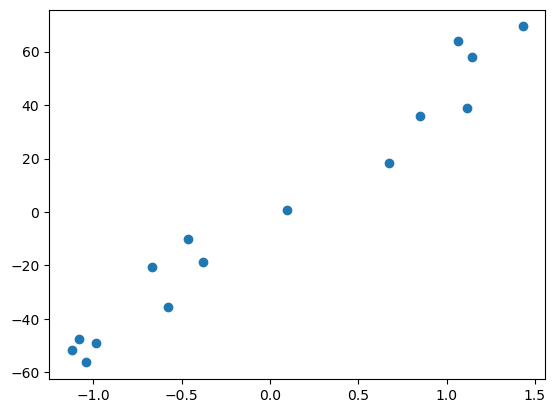

In [20]:
plt.scatter(X,y)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

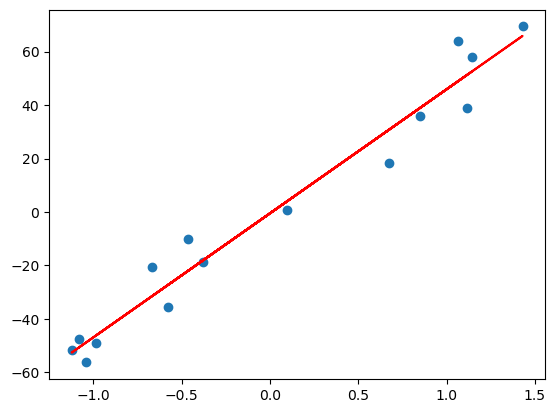

In [24]:
plt.scatter(X,y)
plt.plot(X,lreg.predict(X),color='red')
plt.show()

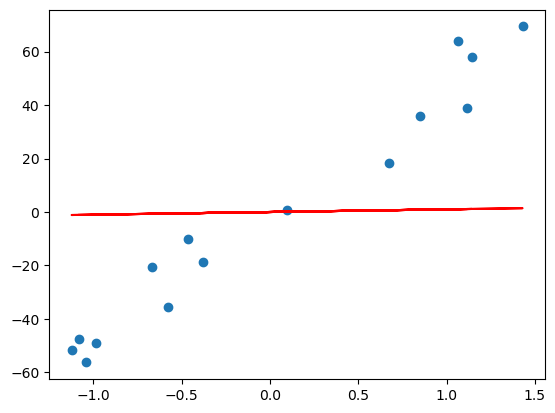

In [30]:
# we and the same m and b by our algorithm
# m=[27.71819977] b=-1.1473722793384897

m = 1
b = 0
initial_line=(m*X+b).reshape(15)
plt.scatter(X,y)
plt.plot(X,initial_line,color='red')
plt.show()

In [31]:
# Initial values
m = -56
b = 10
lr = 0.001
for i in range(10000):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[46.42197217]   b:-0.4935883537411853
m:46.421972171943594   b:-0.49358835374118026


In [32]:
#Some Aniamtion
from matplotlib.animation import FuncAnimation

In [33]:
# Initial values
m = 100
b = -45
lr = 0.001

all_b = []
all_m = []

for i in range(100):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m
  all_b.append(b)
  all_m.append(m)

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[46.42197217]   b:-0.4935883537411853
m:50.691765136237045   b:-2.6498037352701256


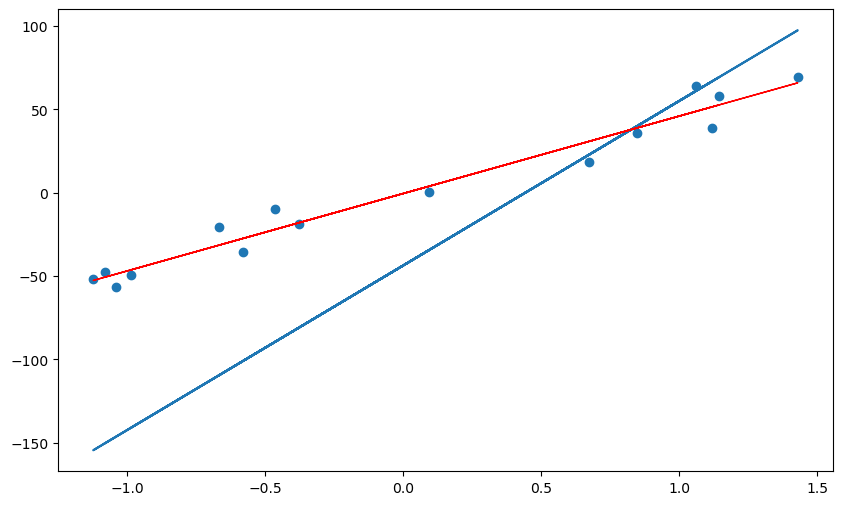

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
# slope_b = -2*np.sum(y-all_m[0]*X.ravel()-all_b[0])
# slope_m = -2*np.sum((y-all_m[0]*X.ravel()-all_b[0])*X.ravel())
line, = ax.plot(X,X*all_m[0]+all_b[0])
ax.scatter(X,y)
ax.plot(X, lreg.predict(X), color='red',linewidth=1)

def update(i):
  # slope_b = -2*np.sum(y-all_m[i]*X.ravel()-all_b[i])
  # slope_m = -2*np.sum((y-all_m[i]*X.ravel()-all_b[i])*X.ravel())
  line.set_ydata(X*all_m[i]+all_b[i])
  line.set_label(f'b:{all_b[i]} m:{all_m[i]}')
  ax.set_xlabel(f'Epoch : {i+1}, m:{all_m[i]}, b:{all_b[i]}')

anim = FuncAnimation(fig,update,frames=25,interval=300)
plt.show()

In [35]:
from matplotlib import rc # https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
rc('animation', html='jshtml')
anim

# Trying 3D Plot

In [36]:
from matplotlib import pyplot as plt
import numpy as np

In [37]:
np.random.seed(83)
x = np.random.normal(3,1,50) #mean, std, size
y = np.random.normal(3,1,50) #peak, flatness, size
z = np.random.normal(3,1,50)

In [38]:
x[0:5],y[0:5]

(array([3.84931289, 1.87725278, 4.14308469, 3.67497599, 2.53517327]),
 array([2.56561395, 2.38851345, 3.28123298, 3.77017387, 3.28525277]))

In [39]:
plt.rcParams['figure.figsize'] = (8,6)

<Axes3DSubplot:>

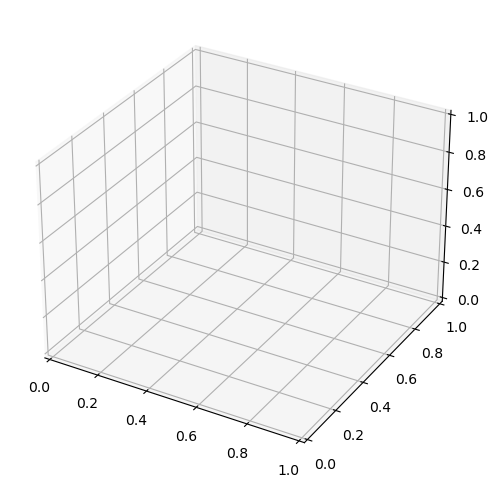

In [40]:
plt.axes(projection='3d')
#Axes object is the region of the image with the data space. A given figure can
#contain many Axes, but a given Axes object can only be in one Figure

Text(0.5, 0, 'z')

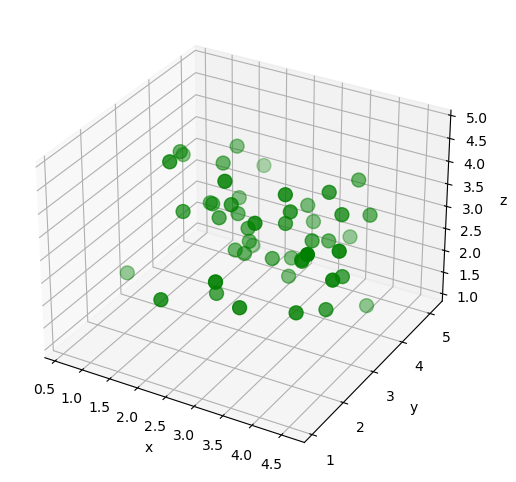

In [41]:
ax = plt.axes(projection='3d')
ax.scatter(x,y,z,s=100,color='green') #ax.plot3D for lines
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 3D Surface plot

In [42]:
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)

def find_z(X,Y):
  return 50+(X**2+y**2)

In [43]:
X, Y = np.meshgrid(x,y)
Z = find_z(X,Y)

In [44]:
X.shape,Y.shape, Z.shape

((50, 50), (50, 50), (50, 50))

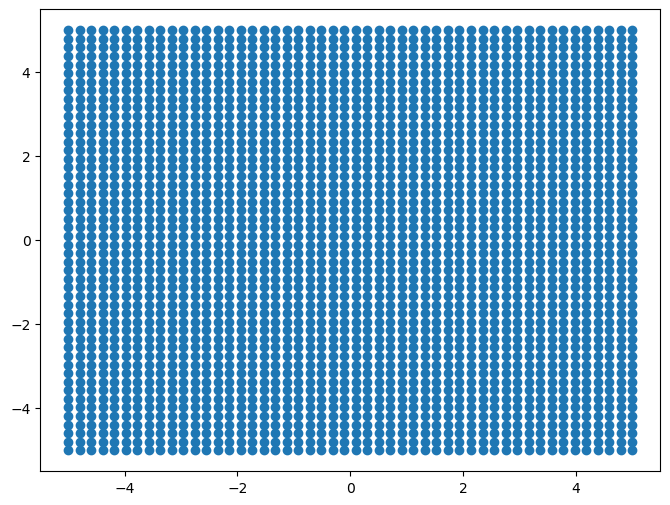

In [45]:
plt.scatter(X,Y)

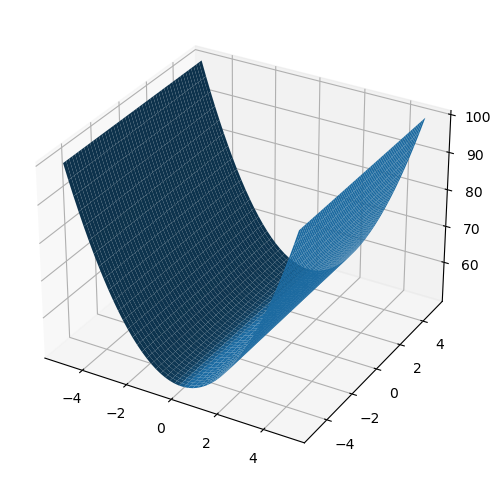

In [46]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

In [47]:
from sklearn.datasets import make_regression 
X,y = make_regression(n_samples = 40, n_features = 1,  n_informative = 1, 
                      n_targets = 1,noise=10, random_state = 13)

In [48]:
x = np.linspace(-25,25,40)
y = np.linspace(-25,25,40)

In [49]:
m,b=np.meshgrid(x,y)

In [50]:
loss=[]
for mm,bb in zip(m,b):
  loss.append(np.power(np.sum(y-mm*X.ravel()-bb),2))

In [51]:
m.shape

(40, 40)

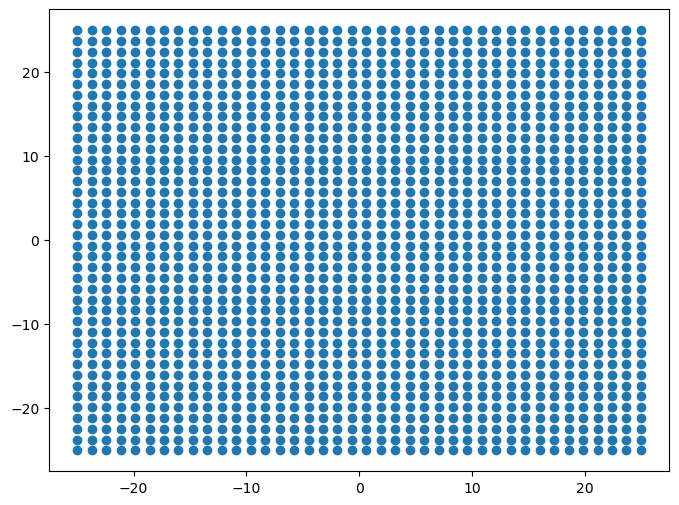

In [52]:
plt.scatter(m,b)

In [53]:
loss = np.array(loss)
loss = np.meshgrid(loss,loss)
loss = loss[0]

((40, 40), (40, 40), (40, 40))

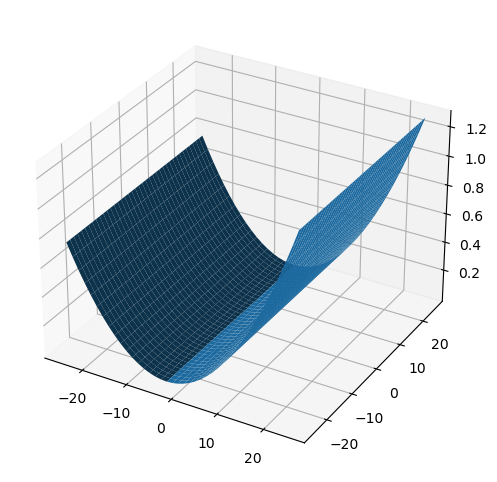

In [54]:
ax = plt.axes(projection='3d')
ax.plot_surface(m,b,loss)
m.shape,b.shape,loss.shape

In [55]:
# Initial values
mm = 20
bb = -1
lr = 0.01

all_b = []
all_m = []
losses = []

for i in range(100):
  slope_b = -2*np.sum(y-mm*X.ravel()-b)
  slope_m = -2*np.sum((y-mm*X.ravel()-bb)*X.ravel())
  loss_mb = np.power(np.sum(y-mm*X.ravel()-bb),2)
  bb = bb - lr*slope_b
  mm = mm - lr*slope_m
  all_b.append(bb)
  all_m.append(mm)
  losses.append(loss_mb)

In [56]:
from matplotlib import cm

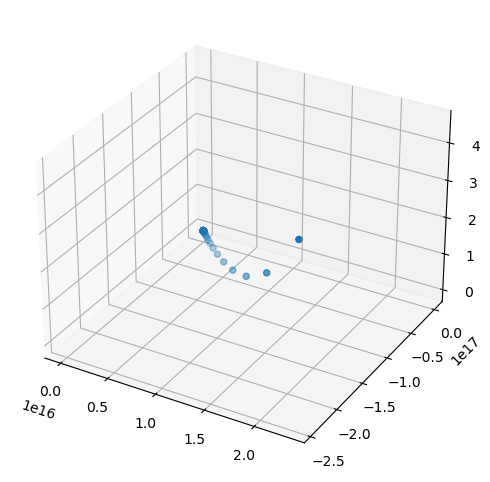

In [57]:
ax = plt.axes(projection='3d') # to work in 3d
ax.scatter(all_m,all_b,losses) #ax.plot3D for lines
ax.plot_surface(m,b,loss,cmap=cm.hot)

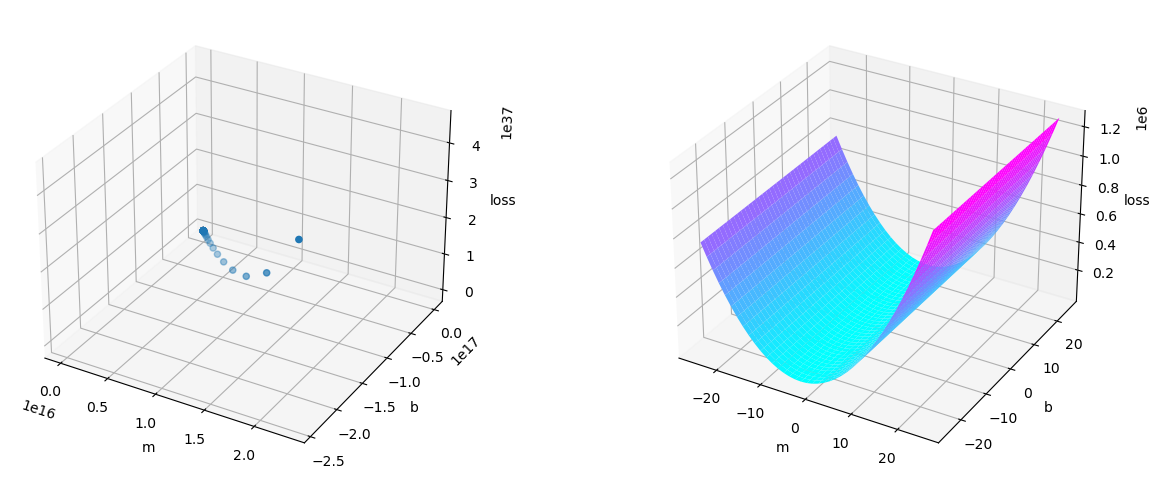

In [58]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(all_m,all_b,losses) #ax.plot3D for lines

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('loss')



ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(m,b,loss,cmap=cm.cool)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('loss')

plt.show()